# Demo -  Air Pollution Forecast based on surrounding cities

## Data Sources

* __Air Pollution Data__ from Chinese Real-Time Air Quality Monitoring Platform, former China MEP
* __Meteorological Data__ from National Climatic Data Center, National Oceanic and Atmospheric Admin, USA

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# %reload_ext nbpresent

In [3]:
aqi_raw = pd.read_csv('data/rawdatasets/city_AQI/city_2020/china_cities_20200101.csv')
aqi_raw

,date,hour,type,北京,天津,石家庄,唐山,秦皇岛,邯郸,保定,...,阿克苏地区,克州,喀什地区,和田地区,伊犁哈萨克州,塔城地区,阿勒泰地区,石河子,五家渠,三沙
0,20200101,0,AQI,54.00,57.00,85.00,72.0,57.00,56.00,96.00,...,144.00,164.0,160.00,221.00,189.00,62.0,24.0,111.00,239.0,NaN
1,20200101,0,PM2.5,31.00,35.00,48.00,43.0,33.00,33.00,72.00,...,110.00,125.0,122.00,171.00,142.00,14.0,17.0,84.00,189.0,NaN
2,20200101,0,PM2.5_24h,21.00,18.00,31.00,33.0,22.00,24.00,37.00,...,110.00,110.0,126.00,88.00,111.00,7.0,7.0,85.00,219.0,NaN
3,20200101,0,PM10,57.00,64.00,119.00,94.0,63.00,61.00,139.00,...,182.00,141.0,178.00,298.00,164.00,74.0,15.0,102.00,252.0,NaN
4,20200101,0,PM10_24h,36.00,32.00,78.00,63.0,49.00,66.00,76.00,...,189.00,221.0,187.00,206.00,130.00,43.0,9.0,106.00,281.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,20200101,23,O3_24h,25.00,29.00,26.00,24.0,53.00,33.00,31.00,...,78.00,72.0,85.00,103.00,42.00,79.0,37.0,54.00,49.0,NaN
356,20200101,23,O3_8h,6.00,8.00,11.00,10.0,25.00,15.00,9.00,...,47.00,55.0,56.00,77.00,21.00,66.0,14.0,27.00,40.0,NaN
357,20200101,23,O3_8h_24h,20.00,19.00,21.00,17.0,46.00,28.00,23.00,...,50.00,61.0,66.00,87.00,28.00,70.0,30.0,40.00,40.0,NaN
358,20200101,23,CO,1.09,1.44,1.40,1.9,1.95,1.15,1.08,...,1.15,0.7,4.63,1.80,4.77,2.2,1.3,1.75,1.4,NaN


## Data extraction 

In [4]:
import process_data

In [5]:
df2019 = process_data.main()

Year?
> 2019
Pollutant type?
> PM2.5_24h
start date? (in the format as 20190101-00) 
> 20190101-00
end date? in the format as 20191231-23) 
> 20191231-23
                           date  hour       type  Beijing  Tianjin  Tangshan  \
2019-01-01 00:00:00  20190101.0   0.0  PM2.5_24h     38.0     49.0      92.0   
2019-01-01 01:00:00  20190101.0   1.0  PM2.5_24h     43.0     51.0      93.0   
2019-01-01 02:00:00  20190101.0   2.0  PM2.5_24h     42.0     52.0      93.0   
2019-01-01 03:00:00  20190101.0   3.0  PM2.5_24h     43.0     52.0      94.0   
2019-01-01 04:00:00  20190101.0   4.0  PM2.5_24h     44.0     53.0      95.0   
...                         ...   ...        ...      ...      ...       ...   
2019-12-31 19:00:00  20191231.0  19.0  PM2.5_24h     15.0     14.0      25.0   
2019-12-31 20:00:00  20191231.0  20.0  PM2.5_24h     16.0     14.0      26.0   
2019-12-31 21:00:00  20191231.0  21.0  PM2.5_24h     17.0     15.0      27.0   
2019-12-31 22:00:00  20191231.0  22.0  PM2.5_2

In [6]:
df2019.index.dtype

dtype('<M8[ns]')

## Data processing

In [7]:
data = pd.read_csv('data/pm25_20192020.csv')
data

,Unnamed: 0,date,hour,type,Beijing,Tianjin,Tangshan,Baoding,Zhangjiakou,Chengde,...,Zhaotong,Lijiang,Lincang,Qamdo,Nyingchi,Hanzhong,Yulin,Ankang,Zhangye,Jiuquan
0,2019-01-01 00:00:00,20190101.0,0.0,PM2.5_24h,38.0,49.0,92.0,82.0,43.0,41.0,...,28.0,16.0,33.0,29.0,8.0,50.0,47.0,53.0,60.0,72.0
1,2019-01-01 01:00:00,20190101.0,1.0,PM2.5_24h,43.0,51.0,93.0,83.0,47.0,41.0,...,37.0,22.0,34.0,NaN,7.0,48.0,48.0,54.0,62.0,72.0
2,2019-01-01 02:00:00,20190101.0,2.0,PM2.5_24h,42.0,52.0,93.0,82.0,49.0,41.0,...,34.0,21.0,34.0,NaN,7.0,50.0,48.0,54.0,65.0,71.0
3,2019-01-01 03:00:00,20190101.0,3.0,PM2.5_24h,43.0,52.0,94.0,82.0,51.0,42.0,...,32.0,21.0,34.0,NaN,7.0,52.0,48.0,54.0,69.0,71.0
4,2019-01-01 04:00:00,20190101.0,4.0,PM2.5_24h,44.0,53.0,95.0,81.0,52.0,42.0,...,23.0,15.0,34.0,NaN,7.0,56.0,48.0,54.0,71.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16579,2020-11-21 19:00:00,20201121.0,19.0,PM2.5_24h,26.0,36.0,53.0,38.0,27.0,28.0,...,29.0,10.0,23.0,12.0,8.0,26.0,28.0,17.0,11.0,14.0
16580,2020-11-21 20:00:00,20201121.0,20.0,PM2.5_24h,26.0,38.0,53.0,39.0,26.0,27.0,...,30.0,11.0,23.0,11.0,8.0,25.0,26.0,16.0,12.0,14.0
16581,2020-11-21 21:00:00,20201121.0,21.0,PM2.5_24h,27.0,40.0,54.0,40.0,25.0,28.0,...,31.0,11.0,23.0,11.0,8.0,24.0,25.0,16.0,11.0,15.0
16582,2020-11-21 22:00:00,20201121.0,22.0,PM2.5_24h,26.0,41.0,54.0,40.0,24.0,28.0,...,32.0,11.0,23.0,12.0,8.0,23.0,23.0,16.0,11.0,15.0


In [8]:
data.rename(columns={"Unnamed: 0": "timestamp"}, inplace=True)

In [9]:
data

,timestamp,date,hour,type,Beijing,Tianjin,Tangshan,Baoding,Zhangjiakou,Chengde,...,Zhaotong,Lijiang,Lincang,Qamdo,Nyingchi,Hanzhong,Yulin,Ankang,Zhangye,Jiuquan
0,2019-01-01 00:00:00,20190101.0,0.0,PM2.5_24h,38.0,49.0,92.0,82.0,43.0,41.0,...,28.0,16.0,33.0,29.0,8.0,50.0,47.0,53.0,60.0,72.0
1,2019-01-01 01:00:00,20190101.0,1.0,PM2.5_24h,43.0,51.0,93.0,83.0,47.0,41.0,...,37.0,22.0,34.0,NaN,7.0,48.0,48.0,54.0,62.0,72.0
2,2019-01-01 02:00:00,20190101.0,2.0,PM2.5_24h,42.0,52.0,93.0,82.0,49.0,41.0,...,34.0,21.0,34.0,NaN,7.0,50.0,48.0,54.0,65.0,71.0
3,2019-01-01 03:00:00,20190101.0,3.0,PM2.5_24h,43.0,52.0,94.0,82.0,51.0,42.0,...,32.0,21.0,34.0,NaN,7.0,52.0,48.0,54.0,69.0,71.0
4,2019-01-01 04:00:00,20190101.0,4.0,PM2.5_24h,44.0,53.0,95.0,81.0,52.0,42.0,...,23.0,15.0,34.0,NaN,7.0,56.0,48.0,54.0,71.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16579,2020-11-21 19:00:00,20201121.0,19.0,PM2.5_24h,26.0,36.0,53.0,38.0,27.0,28.0,...,29.0,10.0,23.0,12.0,8.0,26.0,28.0,17.0,11.0,14.0
16580,2020-11-21 20:00:00,20201121.0,20.0,PM2.5_24h,26.0,38.0,53.0,39.0,26.0,27.0,...,30.0,11.0,23.0,11.0,8.0,25.0,26.0,16.0,12.0,14.0
16581,2020-11-21 21:00:00,20201121.0,21.0,PM2.5_24h,27.0,40.0,54.0,40.0,25.0,28.0,...,31.0,11.0,23.0,11.0,8.0,24.0,25.0,16.0,11.0,15.0
16582,2020-11-21 22:00:00,20201121.0,22.0,PM2.5_24h,26.0,41.0,54.0,40.0,24.0,28.0,...,32.0,11.0,23.0,12.0,8.0,23.0,23.0,16.0,11.0,15.0


In [10]:
data.timestamp.dtype

dtype('O')

In [11]:
data.set_index('timestamp', inplace = True)

In [12]:
data.sort_values(by='timestamp', inplace=True)

In [13]:
#data.to_pickle('pm25_2016_all_cities.pkl', compression='bz2')

In [14]:
data

,date,hour,type,Beijing,Tianjin,Tangshan,Baoding,Zhangjiakou,Chengde,Xingtai,...,Zhaotong,Lijiang,Lincang,Qamdo,Nyingchi,Hanzhong,Yulin,Ankang,Zhangye,Jiuquan
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,20190101.0,0.0,PM2.5_24h,38.0,49.0,92.0,82.0,43.0,41.0,69.0,...,28.0,16.0,33.0,29.0,8.0,50.0,47.0,53.0,60.0,72.0
2019-01-01 01:00:00,20190101.0,1.0,PM2.5_24h,43.0,51.0,93.0,83.0,47.0,41.0,68.0,...,37.0,22.0,34.0,NaN,7.0,48.0,48.0,54.0,62.0,72.0
2019-01-01 02:00:00,20190101.0,2.0,PM2.5_24h,42.0,52.0,93.0,82.0,49.0,41.0,69.0,...,34.0,21.0,34.0,NaN,7.0,50.0,48.0,54.0,65.0,71.0
2019-01-01 03:00:00,20190101.0,3.0,PM2.5_24h,43.0,52.0,94.0,82.0,51.0,42.0,70.0,...,32.0,21.0,34.0,NaN,7.0,52.0,48.0,54.0,69.0,71.0
2019-01-01 04:00:00,20190101.0,4.0,PM2.5_24h,44.0,53.0,95.0,81.0,52.0,42.0,75.0,...,23.0,15.0,34.0,NaN,7.0,56.0,48.0,54.0,71.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-21 19:00:00,20201121.0,19.0,PM2.5_24h,26.0,36.0,53.0,38.0,27.0,28.0,30.0,...,29.0,10.0,23.0,12.0,8.0,26.0,28.0,17.0,11.0,14.0
2020-11-21 20:00:00,20201121.0,20.0,PM2.5_24h,26.0,38.0,53.0,39.0,26.0,27.0,31.0,...,30.0,11.0,23.0,11.0,8.0,25.0,26.0,16.0,12.0,14.0
2020-11-21 21:00:00,20201121.0,21.0,PM2.5_24h,27.0,40.0,54.0,40.0,25.0,28.0,33.0,...,31.0,11.0,23.0,11.0,8.0,24.0,25.0,16.0,11.0,15.0


In [15]:
data.drop(columns = ['date', 'hour','type'], inplace=True)

In [16]:
data.isnull().sum()

Beijing        515
Tianjin        332
Tangshan       335
Baoding        334
Zhangjiakou    340
              ... 
Hanzhong       335
Yulin          340
Ankang         340
Zhangye        340
Jiuquan        333
Length: 96, dtype: int64

## Exploratory Data Analysis (EDA)

In [17]:
df = data.copy()

In [18]:
df

,Beijing,Tianjin,Tangshan,Baoding,Zhangjiakou,Chengde,Xingtai,Taiyuan,Hohehot,Shenyang,...,Zhaotong,Lijiang,Lincang,Qamdo,Nyingchi,Hanzhong,Yulin,Ankang,Zhangye,Jiuquan
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,38.0,49.0,92.0,82.0,43.0,41.0,69.0,92.0,48.0,98.0,...,28.0,16.0,33.0,29.0,8.0,50.0,47.0,53.0,60.0,72.0
2019-01-01 01:00:00,43.0,51.0,93.0,83.0,47.0,41.0,68.0,102.0,47.0,96.0,...,37.0,22.0,34.0,NaN,7.0,48.0,48.0,54.0,62.0,72.0
2019-01-01 02:00:00,42.0,52.0,93.0,82.0,49.0,41.0,69.0,107.0,46.0,96.0,...,34.0,21.0,34.0,NaN,7.0,50.0,48.0,54.0,65.0,71.0
2019-01-01 03:00:00,43.0,52.0,94.0,82.0,51.0,42.0,70.0,111.0,45.0,97.0,...,32.0,21.0,34.0,NaN,7.0,52.0,48.0,54.0,69.0,71.0
2019-01-01 04:00:00,44.0,53.0,95.0,81.0,52.0,42.0,75.0,115.0,44.0,99.0,...,23.0,15.0,34.0,NaN,7.0,56.0,48.0,54.0,71.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-21 19:00:00,26.0,36.0,53.0,38.0,27.0,28.0,30.0,67.0,17.0,35.0,...,29.0,10.0,23.0,12.0,8.0,26.0,28.0,17.0,11.0,14.0
2020-11-21 20:00:00,26.0,38.0,53.0,39.0,26.0,27.0,31.0,66.0,15.0,35.0,...,30.0,11.0,23.0,11.0,8.0,25.0,26.0,16.0,12.0,14.0
2020-11-21 21:00:00,27.0,40.0,54.0,40.0,25.0,28.0,33.0,65.0,14.0,35.0,...,31.0,11.0,23.0,11.0,8.0,24.0,25.0,16.0,11.0,15.0


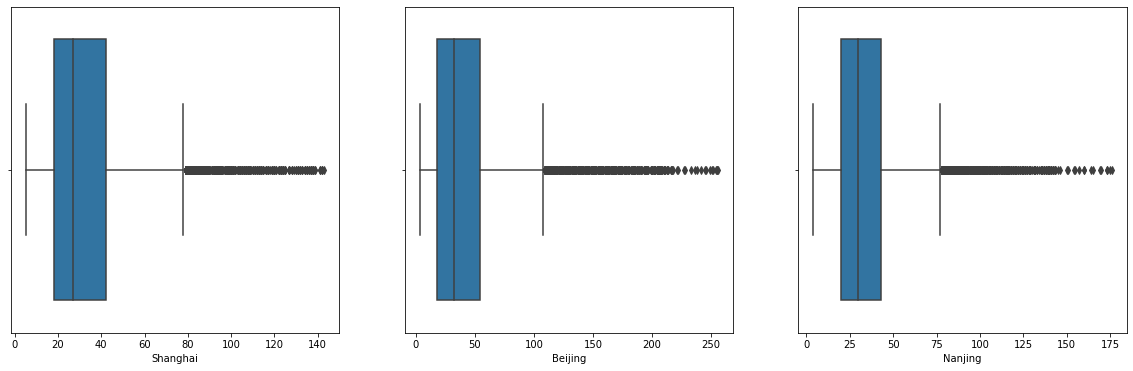

In [19]:
fig, axs = plt.subplots(1, 3,figsize=(20,6))
# plt.figure(figsize=(20, 10))
sns.boxplot(df['Shanghai'], ax = axs[0])
sns.boxplot(df['Beijing'], ax = axs[1])
sns.boxplot(df['Nanjing'], ax = axs[2])
plt.show()


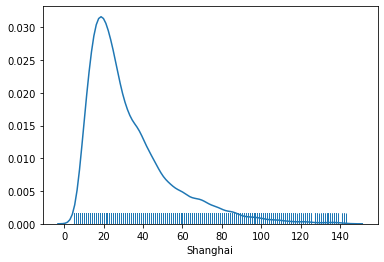

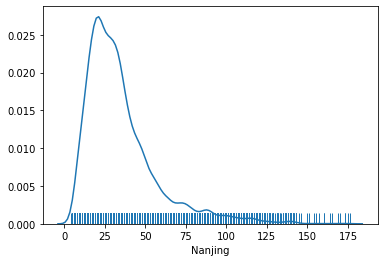

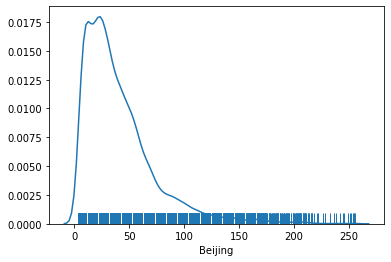

In [20]:
mask = ['Shanghai', 'Nanjing', 'Beijing']

for i in mask:
    sns.distplot(df[i], hist=False, rug=True)
    plt.show()

In [21]:
rec2 = df[['Shanghai']]
rec2.insert(0, 'city', 'Shanghai')
rec2.rename(columns={'Shanghai': 'PM2.5'})

,city,PM2.5
timestamp,,
2019-01-01 00:00:00,Shanghai,26.0
2019-01-01 01:00:00,Shanghai,25.0
2019-01-01 02:00:00,Shanghai,25.0
2019-01-01 03:00:00,Shanghai,24.0
2019-01-01 04:00:00,Shanghai,24.0
...,...,...
2020-11-21 19:00:00,Shanghai,11.0
2020-11-21 20:00:00,Shanghai,11.0
2020-11-21 21:00:00,Shanghai,12.0


In [22]:
df.columns

Index(['Beijing', 'Tianjin', 'Tangshan', 'Baoding', 'Zhangjiakou', 'Chengde',
       'Xingtai', 'Taiyuan', 'Hohehot', 'Shenyang', 'Dalian', 'Changchun',
       'Harbin', 'Shanghai', 'Nanjing', 'Xuzhou', 'Huai'an', 'Hangzhou',
       'Lishui', 'Hefei', 'Fuzhou', 'Xiamen', 'Nanchang', 'Jinan', 'Qingdao',
       'Zhengzhou', 'Wuhan', 'Changsha', 'Guangzhou', 'Shenzhen', 'Nanning',
       'Haikou', 'Chongqing', 'Guiyang', 'Kunming', 'Xining', 'Yinchuan',
       'Yingkou', 'Dandong', 'Weifang', 'Rizhao', 'Shaoguan', 'Shantou',
       'Zhanjiang', 'Shanwei', 'Heyuan', 'Yangjiang', 'Datong', 'Chifeng',
       'Benxi', 'Qiqihar', 'Mudanjiang', 'Anyang', 'Yichang', 'Jingzhou',
       'Yueyang', 'Changde', 'Guilin', 'Beihai', 'Liuzhou', 'Yibin', 'Karamay',
       'Kuerle', 'Liyang', 'Xinyang', 'Tongliao', 'Chaoyang', 'Siping', 'Jixi',
       'Yeechun', 'Bangbu', 'Huangshan', 'Fuyang', 'Bozhou', 'Jingdezhen',
       'Yichun', 'Nanyang', 'Zhumadian', 'Chenzhou', 'Yongzhou', 'Wuzhou',
       'Qinzh

In [23]:
# Checking duplicates
df1 = df.T
print(df1.shape)
df1 = df1.drop_duplicates()
print(df1.shape)

(96, 16584)
(96, 16584)


In [24]:
#data.to_pickle('pm25_2016_all_cities_clean.pkl', compression='bz2')

In [25]:
#df.to_pickle('pm25_2016_cities_2dim.pkl', compression='bz2')
df = pd.read_pickle('data/pm25_cities_2dim.pkl', compression='bz2')

In [26]:
df

,city,PM2.5
timestamp,,
2019-01-01 00:00:00,Beijing,38.0
2019-01-01 01:00:00,Beijing,43.0
2019-01-01 02:00:00,Beijing,42.0
2019-01-01 03:00:00,Beijing,43.0
2019-01-01 04:00:00,Beijing,44.0
...,...,...
2020-11-21 19:00:00,Jiuquan,14.0
2020-11-21 20:00:00,Jiuquan,14.0
2020-11-21 21:00:00,Jiuquan,15.0


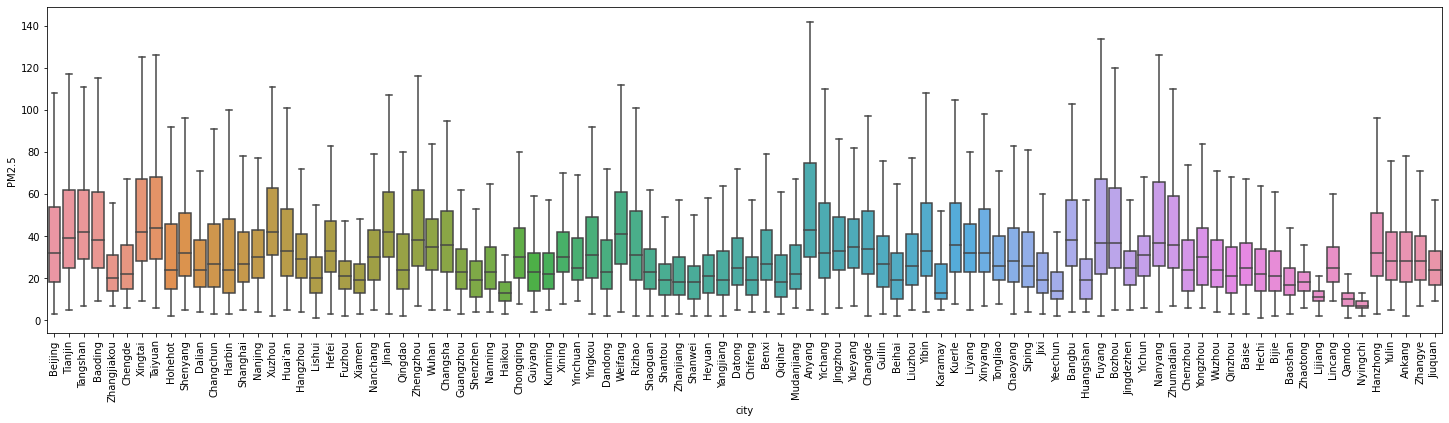

In [27]:
fig, axes = plt.subplots(1, 1, figsize= (25, 6))
ax = sns.boxplot(x = 'city', y = 'PM2.5', data=df, showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
print('')
plt.savefig('PM25_city_box.png', format='png')

In [28]:
df = df.reset_index()

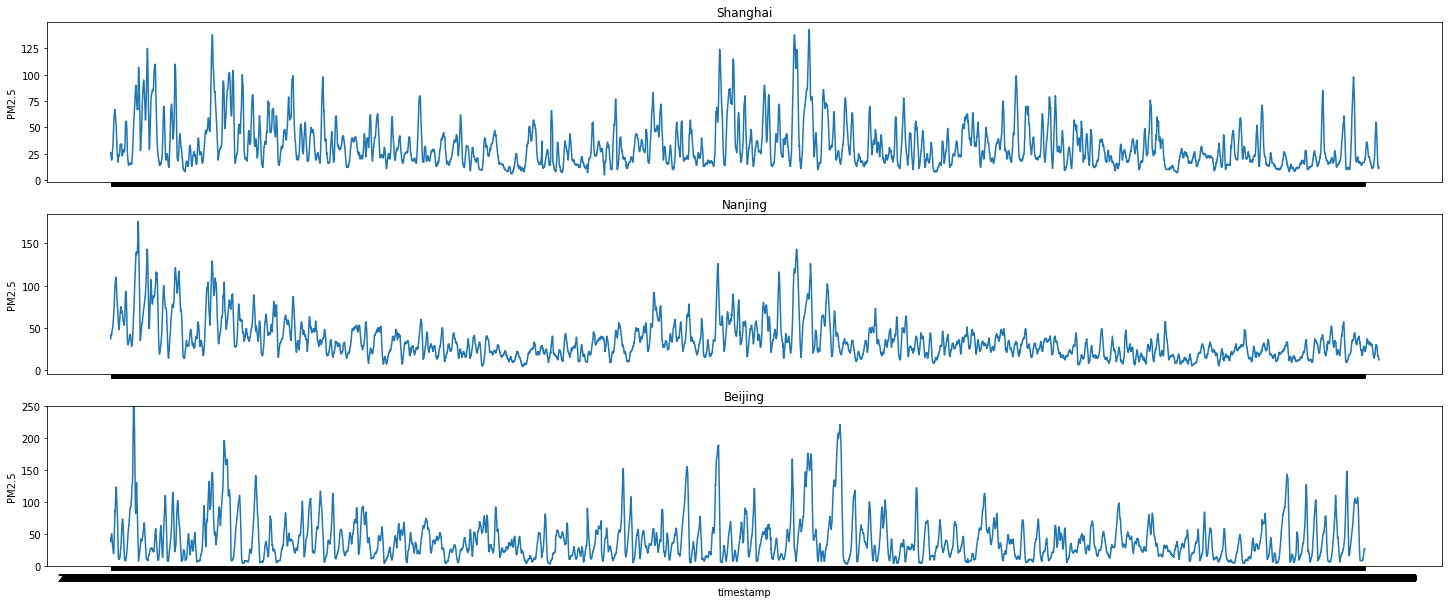

In [30]:
fig, axes = plt.subplots(3, 1, figsize= (25, 10), sharex=True)
sns.lineplot(x = 'timestamp', y = 'PM2.5', data=df[df['city']=='Shanghai'], ax=axes[0])
plt.ylim(0, 250)
sns.lineplot(x = 'timestamp', y = 'PM2.5', data=df[df['city']=='Nanjing'], ax=axes[1])
plt.ylim(0, 250)
sns.lineplot(x = 'timestamp', y = 'PM2.5', data=df[df['city']=='Beijing'], ax=axes[2])
plt.ylim(0, 250)
mask = ['Shanghai', 'Nanjing', 'Beijing']
for i in [0, 1, 2]:
    axes[i].set_title(mask[i])

plt.savefig('PM25_in_3cities.png', format='png')

## Geo Information

In [31]:
geo = pd.read_csv('data/geo_distance.csv')

In [32]:
geo

,city,station name,province,station_id,lat,lon,Elevation (m),geometry,geo_wgs,distance2Shanghai
0,Shanghai,上海,上海,583670,31.12,121.26,8.6,POINT (121.26 31.12),POINT (121.26 31.12),0.000000
1,Beijing,北京,北京,545110,39.48,116.28,32.5,POINT (116.28 39.48),POINT (116.28 39.48),1031.741531
2,Tianjin,天津,天津,545270,39.05,117.03,4.3,POINT (117.03 39.05),POINT (117.03 39.05),960.310172
3,Tangshan,唐山,河北,545340,39.39,118.06,24.5,POINT (118.06 39.39),POINT (118.06 39.39),962.432780
4,Baoding,保定,河北,546020,38.44,115.29,17.9,POINT (115.29 38.44),POINT (115.29 38.44),978.242903
...,...,...,...,...,...,...,...,...,...,...
91,Hanzhong,汉中,陕西,571270,33.04,107.02,510.7,POINT (107.02 33.04),POINT (107.02 33.04),1360.062763
92,Yulin,榆林,陕西,536460,38.16,109.47,1157.8,POINT (109.47 38.16),POINT (109.47 38.16),1331.738604
93,Ankang,安康,陕西,572450,32.43,109.02,291.7,POINT (109.02 32.43),POINT (109.02 32.43),1167.812848
94,Zhangye,张掖,甘肃,526520,39.05,100.17,1462.3,POINT (100.17 39.05),POINT (100.17 39.05),2108.172897


In [33]:
geo.set_index('city', inplace=True)

In [ ]:
geo

In [ ]:
#geo.to_csv('../lists/working_sites_geo.csv')

In [34]:
geo.loc['Nanjing']

station name                           南京
province                               江苏
station_id                         582380
lat                                 31.56
lon                                118.54
Elevation (m)                        36.4
geometry             POINT (118.54 31.56)
geo_wgs              POINT (118.54 31.56)
distance2Shanghai                 263.395
Name: Nanjing, dtype: object

In [35]:
data.reset_index()

,timestamp,Beijing,Tianjin,Tangshan,Baoding,Zhangjiakou,Chengde,Xingtai,Taiyuan,Hohehot,...,Zhaotong,Lijiang,Lincang,Qamdo,Nyingchi,Hanzhong,Yulin,Ankang,Zhangye,Jiuquan
0,2019-01-01 00:00:00,38.0,49.0,92.0,82.0,43.0,41.0,69.0,92.0,48.0,...,28.0,16.0,33.0,29.0,8.0,50.0,47.0,53.0,60.0,72.0
1,2019-01-01 01:00:00,43.0,51.0,93.0,83.0,47.0,41.0,68.0,102.0,47.0,...,37.0,22.0,34.0,NaN,7.0,48.0,48.0,54.0,62.0,72.0
2,2019-01-01 02:00:00,42.0,52.0,93.0,82.0,49.0,41.0,69.0,107.0,46.0,...,34.0,21.0,34.0,NaN,7.0,50.0,48.0,54.0,65.0,71.0
3,2019-01-01 03:00:00,43.0,52.0,94.0,82.0,51.0,42.0,70.0,111.0,45.0,...,32.0,21.0,34.0,NaN,7.0,52.0,48.0,54.0,69.0,71.0
4,2019-01-01 04:00:00,44.0,53.0,95.0,81.0,52.0,42.0,75.0,115.0,44.0,...,23.0,15.0,34.0,NaN,7.0,56.0,48.0,54.0,71.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16579,2020-11-21 19:00:00,26.0,36.0,53.0,38.0,27.0,28.0,30.0,67.0,17.0,...,29.0,10.0,23.0,12.0,8.0,26.0,28.0,17.0,11.0,14.0
16580,2020-11-21 20:00:00,26.0,38.0,53.0,39.0,26.0,27.0,31.0,66.0,15.0,...,30.0,11.0,23.0,11.0,8.0,25.0,26.0,16.0,12.0,14.0
16581,2020-11-21 21:00:00,27.0,40.0,54.0,40.0,25.0,28.0,33.0,65.0,14.0,...,31.0,11.0,23.0,11.0,8.0,24.0,25.0,16.0,11.0,15.0
16582,2020-11-21 22:00:00,26.0,41.0,54.0,40.0,24.0,28.0,35.0,64.0,13.0,...,32.0,11.0,23.0,12.0,8.0,23.0,23.0,16.0,11.0,15.0


In [36]:
data.loc[data.index[8573]]

Beijing         65.0
Tianjin         60.0
Tangshan        72.0
Baoding        108.0
Zhangjiakou     29.0
               ...  
Hanzhong       108.0
Yulin           80.0
Ankang          57.0
Zhangye         34.0
Jiuquan         33.0
Name: 2019-12-24 05:00:00, Length: 96, dtype: float64

In [37]:
geo_cool=geo.copy()

In [38]:
geo_cool['time8573'] =data.loc[data.index[8573]]

In [39]:
geo_cool

,station name,province,station_id,lat,lon,Elevation (m),geometry,geo_wgs,distance2Shanghai,time8573
city,,,,,,,,,,
Shanghai,上海,上海,583670,31.12,121.26,8.6,POINT (121.26 31.12),POINT (121.26 31.12),0.000000,37.0
Beijing,北京,北京,545110,39.48,116.28,32.5,POINT (116.28 39.48),POINT (116.28 39.48),1031.741531,65.0
Tianjin,天津,天津,545270,39.05,117.03,4.3,POINT (117.03 39.05),POINT (117.03 39.05),960.310172,60.0
Tangshan,唐山,河北,545340,39.39,118.06,24.5,POINT (118.06 39.39),POINT (118.06 39.39),962.432780,72.0
Baoding,保定,河北,546020,38.44,115.29,17.9,POINT (115.29 38.44),POINT (115.29 38.44),978.242903,108.0
...,...,...,...,...,...,...,...,...,...,...
Hanzhong,汉中,陕西,571270,33.04,107.02,510.7,POINT (107.02 33.04),POINT (107.02 33.04),1360.062763,108.0
Yulin,榆林,陕西,536460,38.16,109.47,1157.8,POINT (109.47 38.16),POINT (109.47 38.16),1331.738604,80.0
Ankang,安康,陕西,572450,32.43,109.02,291.7,POINT (109.02 32.43),POINT (109.02 32.43),1167.812848,57.0


In [40]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [41]:
import plotly.express as px

fig = px.density_mapbox(geo_cool, lat='lat', lon='lon', z =None, radius=10,
                        center=dict(lat=33.04, lon=107.2), zoom=3.5,
                        mapbox_style="stamen-terrain", width=1000, height=800)
fig.show()

In [42]:
import plotly.express as px

fig = px.density_mapbox(geo_cool, lat='lat', lon='lon', z ='time8573', radius=30,
                        center=dict(lat=33.04, lon=107.2), zoom=3.5,
                        mapbox_style="stamen-terrain", width=1000, height=800)
fig.show()

In [45]:
t2020oct = pd.read_pickle('data/pm25_cities_20nov20.pkl', compression='bz2')

In [93]:
t2020oct

,city,PM2.5
2020-11-20 00:00:00,Beijing,8.0
2020-11-20 01:00:00,Beijing,8.0
2020-11-20 02:00:00,Beijing,8.0
2020-11-20 03:00:00,Beijing,8.0
2020-11-20 04:00:00,Beijing,8.0
...,...,...
2020-11-21 19:00:00,Jiuquan,14.0
2020-11-21 20:00:00,Jiuquan,14.0
2020-11-21 21:00:00,Jiuquan,15.0
2020-11-21 22:00:00,Jiuquan,15.0


In [47]:
geo_lat = geo.loc[:,'lat']
    

In [48]:
geo_lon = geo.loc[:,'lon']

In [49]:
geo_essence = pd.merge(geo_lat, geo_lon, right_index = True, left_index = True)

In [50]:
geo_essence.reset_index(inplace=True)

In [51]:
t_city_geo = pd.merge(t2020oct, geo_essence, right_index = True, on='city')

In [52]:
t_city_geo.reset_index(inplace=True)

In [53]:
t_city_geo.rename(columns={"index": "datehours"}, inplace=True)

In [55]:
t_city_geo.datehours.dtype

dtype('<M8[ns]')

In [70]:
my_test = t_city_geo.copy()


In [75]:
test = my_test.astype({'datehours': 'str'})

In [77]:
test.datehours.dtype

dtype('O')

In [80]:
test.sort_values(by='datehours', inplace=True)

In [81]:
test

,datehours,city,PM2.5,lat,lon
0,2020-11-20 00:00:00,Beijing,8.0,39.48,116.28
1344,2020-11-20 00:00:00,Guangzhou,22.0,23.13,113.29
1392,2020-11-20 00:00:00,Shenzhen,13.0,22.32,114.00
1440,2020-11-20 00:00:00,Nanning,24.0,22.38,108.13
1488,2020-11-20 00:00:00,Haikou,12.0,20.00,110.15
...,...,...,...,...,...
3167,2020-11-21 23:00:00,Tongliao,29.0,43.36,122.16
3215,2020-11-21 23:00:00,Chaoyang,24.0,41.33,120.26
3263,2020-11-21 23:00:00,Siping,39.0,43.10,124.20
2831,2020-11-21 23:00:00,Beihai,15.0,21.27,109.08


In [92]:
fig = px.density_mapbox(test, lat='lat', lon='lon', z ='PM2.5', radius=28,
                        animation_frame="datehours", range_color=[0,50])

fig.update_layout(mapbox_style="carto-positron", mapbox_zoom=3, 
                  mapbox_center = {"lat":33.04, "lon":107.2},)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 600
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 600
fig.layout.coloraxis.showscale = True  
fig.layout.sliders[0].pad.t = 10
fig.layout.updatemenus[0].pad.t= 10             

fig.show()

## Handling the missing data

In [ ]:
data

In [ ]:
df

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaler.fit(df[['PM2.5']])

X_norm = scaler.transform(df[['PM2.5']])

In [ ]:
X_norm